# **PlayStore Analysis**



# Imports

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
!pip install CurrencyConverter
from currency_converter import CurrencyConverter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from keras.layers import Dense,BatchNormalization,Flatten
from keras.models import Sequential
import keras
from keras.metrics import mean_absolute_error
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 547 kB 4.5 MB/s 


# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:

playstore = pd.read_csv("gdrive/Shareddrives/Google Playstore/clean_dataset.csv")

In [5]:
playstore.columns = [c.replace(' ', '_') for c in playstore.columns]

In [6]:
playstore.head()

,Category,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,...,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time,Days_Since_Release,Days_Since_Last_Update,Rating_Density,Revenue
0,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7.1 and up,...,2/26/2020,Everyone,False,False,False,6/15/2021,476,476,0.000000,0.0
1,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5.0 and up,...,5/6/2021,Everyone,True,False,False,6/15/2021,391,41,0.008353,0.0
2,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,...,8/19/2019,Everyone,False,False,False,6/15/2021,677,667,0.000000,0.0
3,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,...,10/13/2018,Everyone,True,False,False,6/15/2021,1010,977,0.263158,0.0
4,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4.1 and up,...,11/12/2018,Everyone,False,False,False,6/15/2021,481,947,0.000000,0.0


In [7]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013035 entries, 0 to 1013034
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Category                1013035 non-null  object 
 1   Rating                  1013035 non-null  float64
 2   Rating_Count            1013035 non-null  float64
 3   Minimum_Installs        1013035 non-null  float64
 4   Maximum_Installs        1013035 non-null  int64  
 5   Free                    1013035 non-null  bool   
 6   Price                   1013035 non-null  float64
 7   Currency                1013035 non-null  object 
 8   Size                    1013035 non-null  object 
 9   Minimum_Android         1013035 non-null  object 
 10  Released                1013035 non-null  object 
 11  Last_Updated            1013035 non-null  object 
 12  Content_Rating          1013035 non-null  object 
 13  Ad_Supported            1013035 non-null  bool   
 14  In

# Descriptive Analytics

In [8]:
# Stats
playstore.describe().applymap(lambda x: f"{x:0.3f}")

,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Price,Days_Since_Release,Days_Since_Last_Update,Rating_Density,Revenue
count,1013035.000,1013035.000,1013035.000,1013035.000,1013035.000,1013035.000,1013035.000,1008122.000,1013035.000
mean,2.209,2921.395,177492.678,305903.376,0.104,1022.792,560.736,inf,1391.568
std,2.108,258893.356,13481434.057,20797984.290,2.576,773.147,555.981,nan,279692.738
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
25%,0.000,0.000,50.000,86.000,0.000,428.000,132.000,0.000,0.000
50%,3.000,6.000,500.000,708.000,0.000,821.000,399.000,0.002,0.000
75%,4.300,42.000,5000.000,7446.000,0.000,1448.000,794.000,0.008,0.000
max,5.000,138557570.000,5000000000.000,9766230924.000,400.000,4158.000,4510.000,inf,271013081.780


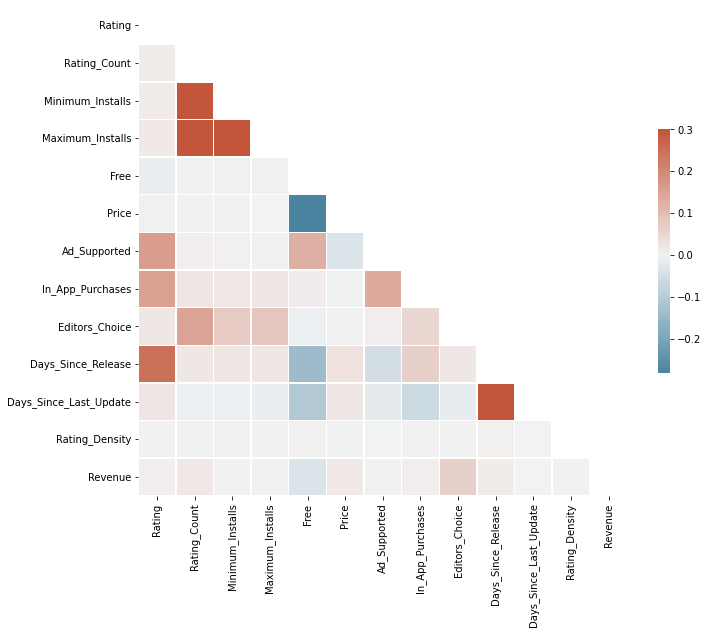

In [9]:
# Corr
corr = playstore.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Distribution of Rating')]

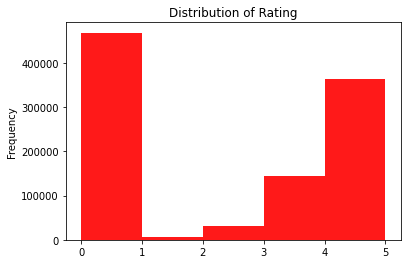

In [10]:
# Hist - Rating
x1 = playstore.Rating
kwargs = dict(alpha=0.9, bins=5)
plt.hist(x1, **kwargs, color='r', label='Rating')
plt.gca().set(title='Distribution of Rating', ylabel='Frequency')


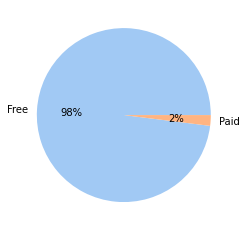

In [11]:
# Pie - Paid
labels = ['Free', 'Paid']
colors = sns.color_palette('pastel')[0:2]
plt.pie(playstore.Free.value_counts(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

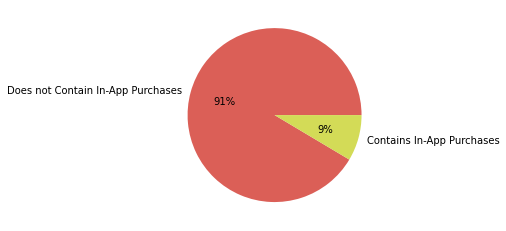

In [12]:
# Pie - In-App Purchases
labels = ['Does not Contain In-App Purchases','Contains In-App Purchases']
colors = sns.color_palette('hls')[0:2]
plt.pie(playstore.In_App_Purchases.value_counts(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Pre-processing

In [13]:
df = playstore.copy()
df

,Category,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Free,Price,Currency,Size,Minimum_Android,...,Last_Updated,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Scraped_Time,Days_Since_Release,Days_Since_Last_Update,Rating_Density,Revenue
0,Adventure,0.0,0.0,10.0,15,True,0.00,USD,10M,7.1 and up,...,2/26/2020,Everyone,False,False,False,6/15/2021,476,476,0.000000,0.00
1,Tools,4.4,64.0,5000.0,7662,True,0.00,USD,2.9M,5.0 and up,...,5/6/2021,Everyone,True,False,False,6/15/2021,391,41,0.008353,0.00
2,Productivity,0.0,0.0,50.0,58,True,0.00,USD,3.7M,4.0.3 and up,...,8/19/2019,Everyone,False,False,False,6/15/2021,677,667,0.000000,0.00
3,Communication,5.0,5.0,10.0,19,True,0.00,USD,1.8M,4.0.3 and up,...,10/13/2018,Everyone,True,False,False,6/15/2021,1010,977,0.263158,0.00
4,Tools,0.0,0.0,100.0,478,True,0.00,USD,6.2M,4.1 and up,...,11/12/2018,Everyone,False,False,False,6/15/2021,481,947,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013030,Entertainment,3.4,61.0,5000.0,9851,True,0.00,USD,1.1M,4.0.3 and up,...,5/10/2019,Everyone,True,False,False,6/16/2021,2131,769,0.006192,0.00
1013031,Social,0.0,0.0,10.0,15,False,1.49,USD,1.9M,2.2 and up,...,4/19/2016,Teen,False,False,False,6/16/2021,2774,1885,0.000000,22.35
1013032,Arcade,4.4,47.0,10000.0,22742,True,0.00,USD,28M,4.1 and up,...,1/2/2019,Everyone,True,True,False,6/16/2021,911,897,0.002067,0.00
1013033,Food & Drink,0.0,0.0,5.0,9,True,0.00,USD,21M,4.4 and up,...,1/17/2020,Everyone,False,False,False,6/16/2021,526,517,0.000000,0.00


In [14]:
# check for null
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

Category have 0   null value
Rating have 0   null value
Rating_Count have 0   null value
Minimum_Installs have 0   null value
Maximum_Installs have 0   null value
Free have 0   null value
Price have 0   null value
Currency have 0   null value
Size have 0   null value
Minimum_Android have 0   null value
Released have 0   null value
Last_Updated have 0   null value
Content_Rating have 0   null value
Ad_Supported have 0   null value
In_App_Purchases have 0   null value
Editors_Choice have 0   null value
Scraped_Time have 0   null value
Days_Since_Release have 0   null value
Days_Since_Last_Update have 0   null value
Rating_Density have 4913   null value
Revenue have 0   null value


In [15]:
categorical_columns=[]
for col in df.columns:
    if df[col].dtype=='O':
        categorical_columns.append(col)
categorical_columns

['Category',
 'Currency',
 'Size',
 'Minimum_Android',
 'Released',
 'Last_Updated',
 'Content_Rating',
 'Scraped_Time']

In [16]:
# Clean Size
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

df['Size']=df['Size'].apply(define_size)

In [17]:
# Category
lbl_category=LabelEncoder()
df['Category']=lbl_category.fit_transform(df['Category'])

In [18]:
# Content Rating
lbl_content_rating=LabelEncoder()
df['Content_Rating']=lbl_content_rating.fit_transform(df['Content_Rating'])

In [19]:
# Minimum Android Version 
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
df['Minimum_Android']=df['Minimum_Android'].apply(min_android)


In [20]:
# Currency - convert all currency to USD
cc=CurrencyConverter()

def currency_to_USD(data):
    if data not in cc.currencies:
        data=1
    else:
        data=cc.convert(1,data,'USD')
    return data

df['Currency']= df['Currency'].apply(currency_to_USD)

In [21]:
# convert Price to usd
df.Price = df.Price * df.Currency

In [22]:
# convert Revenue to usd
df.Revenue = df.Price * df.Maximum_Installs

In [23]:
df.drop(['Released','Last_Updated','Currency','Scraped_Time'],inplace=True,axis=1)

In [24]:
bln=[]
for col in df.columns:
    if df[col].dtype=='bool':
        bln.append(col)
bln

['Free', 'Ad_Supported', 'In_App_Purchases', 'Editors_Choice']

In [25]:
# convert boolean variables to numeric
df = df.astype({'Free': int, 'Ad_Supported': int,'In_App_Purchases': int, 'Editors_Choice': int})  

In [26]:
df.head()

,Category,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Free,Price,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days_Since_Release,Days_Since_Last_Update,Rating_Density,Revenue
0,1,0.0,0.0,10.0,15,1,0.0,10000.0,7.1,1,0,0,0,476,476,0.000000,0.0
1,42,4.4,64.0,5000.0,7662,1,0.0,2900.0,5.0,1,1,0,0,391,41,0.008353,0.0
2,33,0.0,0.0,50.0,58,1,0.0,3700.0,4.0,1,0,0,0,677,667,0.000000,0.0
3,13,5.0,5.0,10.0,19,1,0.0,1800.0,4.0,1,1,0,0,1010,977,0.263158,0.0
4,42,0.0,0.0,100.0,478,1,0.0,6200.0,4.1,1,0,0,0,481,947,0.000000,0.0


In [27]:
df['isPopular'] = df['Rating'] > 2.5
df = df.astype({'isPopular': int}) 

In [28]:
df.head()

,Category,Rating,Rating_Count,Minimum_Installs,Maximum_Installs,Free,Price,Size,Minimum_Android,Content_Rating,Ad_Supported,In_App_Purchases,Editors_Choice,Days_Since_Release,Days_Since_Last_Update,Rating_Density,Revenue,isPopular
0,1,0.0,0.0,10.0,15,1,0.0,10000.0,7.1,1,0,0,0,476,476,0.000000,0.0,0
1,42,4.4,64.0,5000.0,7662,1,0.0,2900.0,5.0,1,1,0,0,391,41,0.008353,0.0,1
2,33,0.0,0.0,50.0,58,1,0.0,3700.0,4.0,1,0,0,0,677,667,0.000000,0.0,0
3,13,5.0,5.0,10.0,19,1,0.0,1800.0,4.0,1,1,0,0,1010,977,0.263158,0.0,1
4,42,0.0,0.0,100.0,478,1,0.0,6200.0,4.1,1,0,0,0,481,947,0.000000,0.0,0


In [30]:
# check for null
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

Category have 0   null value
Rating have 0   null value
Rating_Count have 0   null value
Minimum_Installs have 0   null value
Maximum_Installs have 0   null value
Free have 0   null value
Price have 0   null value
Size have 0   null value
Minimum_Android have 0   null value
Content_Rating have 0   null value
Ad_Supported have 0   null value
In_App_Purchases have 0   null value
Editors_Choice have 0   null value
Days_Since_Release have 0   null value
Days_Since_Last_Update have 0   null value
Rating_Density have 4913   null value
Revenue have 0   null value
isPopular have 0   null value


# Modeling


[]

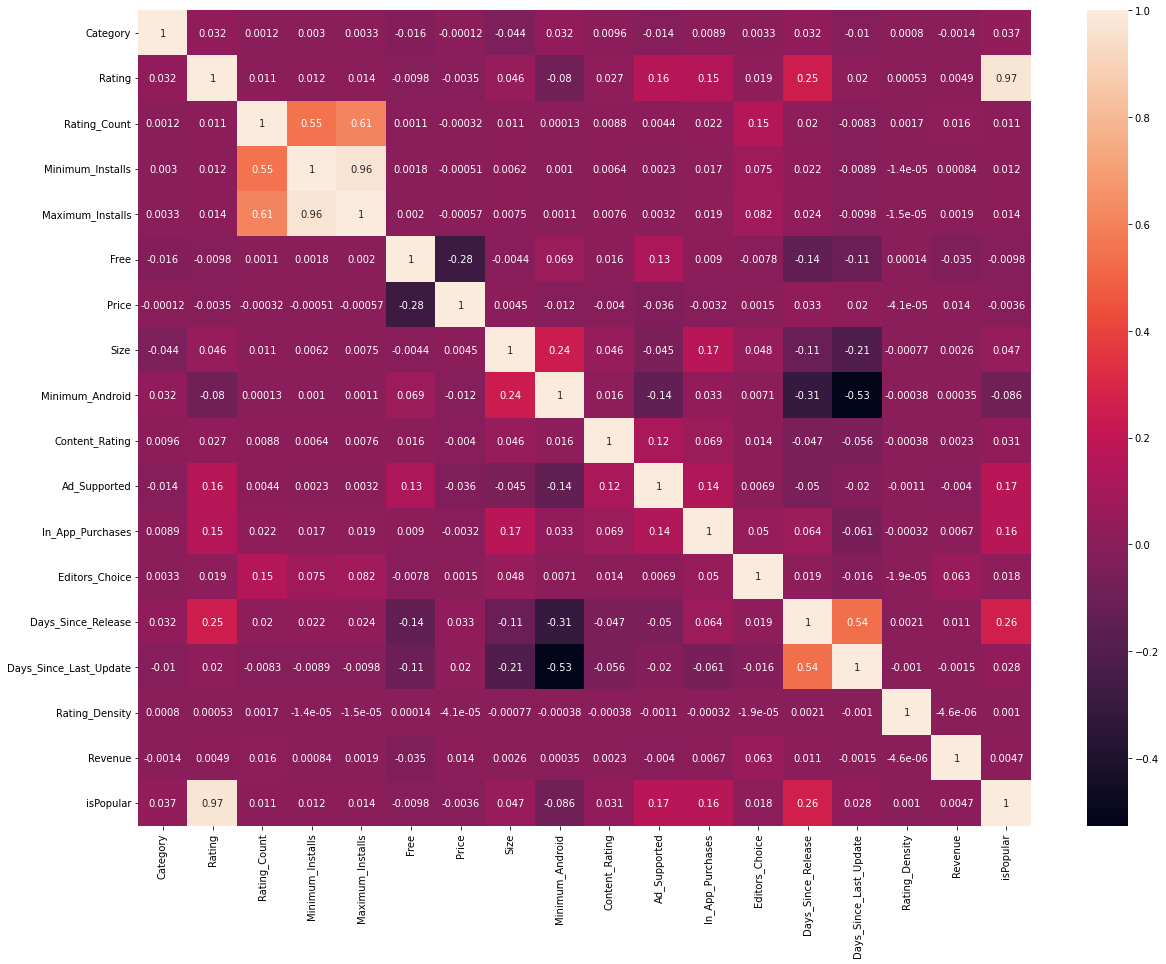

In [31]:
#take a look at corr first (Looks like maximum and minimum are highly correlated)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013035 entries, 0 to 1013034
Data columns (total 18 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Category                1013035 non-null  int64  
 1   Rating                  1013035 non-null  float64
 2   Rating_Count            1013035 non-null  float64
 3   Minimum_Installs        1013035 non-null  float64
 4   Maximum_Installs        1013035 non-null  int64  
 5   Free                    1013035 non-null  int64  
 6   Price                   1013035 non-null  float64
 7   Size                    1013035 non-null  float64
 8   Minimum_Android         1013035 non-null  float64
 9   Content_Rating          1013035 non-null  int64  
 10  Ad_Supported            1013035 non-null  int64  
 11  In_App_Purchases        1013035 non-null  int64  
 12  Editors_Choice          1013035 non-null  int64  
 13  Days_Since_Release      1013035 non-null  int64  
 14  Da

In [33]:
# Test Train Split 
train_data,test_data=train_test_split(df,test_size=0.15,random_state=42)


In [34]:
#Dependent: Maximum Installs 
y_test_linear=test_data.iloc[:,4]
x_test_linear=test_data.drop(['Minimum_Installs','Maximum_Installs','Rating_Density', 'isPopular'],axis=1)
y_train_linear=train_data.iloc[:,4]
x_train_linear=train_data.drop(['Minimum_Installs','Maximum_Installs','Rating_Density', 'isPopular'],axis=1)

In [35]:
# Multivariate Linear Regression - Dependent: Maximum Installs
model_1=LinearRegression()
model_1.fit(x_train_linear,y_train_linear)
print('r2_score of training data',r2_score(model_1.predict(x_train_linear).round(1),y_train_linear))
print('r2_score of testing data',r2_score(model_1.predict(x_test_linear).round(1),y_test_linear))

r2_score of training data -0.5541650807248422
r2_score of testing data -8.388271699765127


In [36]:
print('mean absolute error of training data',mean_absolute_error(model_1.predict(x_train_linear).round(1),y_train_linear))
print('mean absolute error of testing data',mean_absolute_error(model_1.predict(x_test_linear).round(1),y_test_linear))

mean absolute error of training data tf.Tensor(445584, shape=(), dtype=int64)
mean absolute error of testing data tf.Tensor(470628, shape=(), dtype=int64)


In [37]:
# Logistic Regression - Dependent: isPopular
y_test_logistic =test_data.iloc[:,17]
x_test_logistic=test_data.drop(['Minimum_Installs','Rating_Density', 'isPopular', 'Rating'],axis=1)
y_train_logistic=train_data.iloc[:,17]
x_train_logistic=train_data.drop(['Minimum_Installs','Rating_Density', 'isPopular','Rating'],axis=1)

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train_logistic, y_train_logistic)

LogisticRegression()

In [39]:
#Accuracy
y_pred = logreg.predict(x_test_logistic)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_logistic, y_test_logistic)))

Accuracy of logistic regression classifier on test set: 0.73


In [40]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test_logistic, y_pred)
print(confusion_matrix)

[[58786 13974]
 [26318 52878]]


In [41]:
x# Classification
print(classification_report(y_test_logistic, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74     72760
           1       0.79      0.67      0.72     79196

    accuracy                           0.73    151956
   macro avg       0.74      0.74      0.73    151956
weighted avg       0.74      0.73      0.73    151956



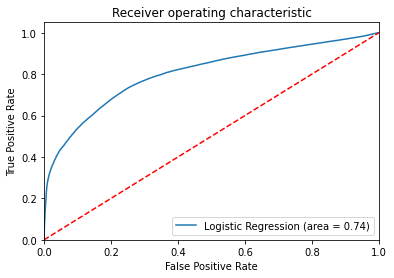

In [42]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_logistic, logreg.predict(x_test_logistic))
fpr, tpr, thresholds = roc_curve(y_test_logistic, logreg.predict_proba(x_test_logistic)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train_logistic, y_train_logistic)
y_pred = clf.predict(x_test_logistic)

In [45]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test_logistic, y_pred))

ACCURACY OF THE MODEL:  0.9814485772197215


In [48]:
feature_imp = pd.Series(clf.feature_importances_, index = x_train_logistic.columns).sort_values(ascending = False)
feature_imp

Rating_Count              0.718520
Maximum_Installs          0.193098
Days_Since_Release        0.029910
Days_Since_Last_Update    0.015322
Size                      0.011764
Ad_Supported              0.008696
Category                  0.008120
In_App_Purchases          0.006235
Minimum_Android           0.004987
Revenue                   0.001763
Content_Rating            0.001050
Price                     0.000374
Free                      0.000157
Editors_Choice            0.000005
dtype: float64

In [79]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x_train_logistic,y_train_logistic)
y_pred = clf.predict(x_test_logistic)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test_logistic, y_pred))

Accuracy: 0.9814090921056096


In [81]:
#!pip install dtreeviz
import matplotlib.font_manager

In [82]:
y_train = y_train_logistic.to_frame()

In [83]:
y_train.isPopular.values

array([1, 1, 0, ..., 0, 0, 1])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


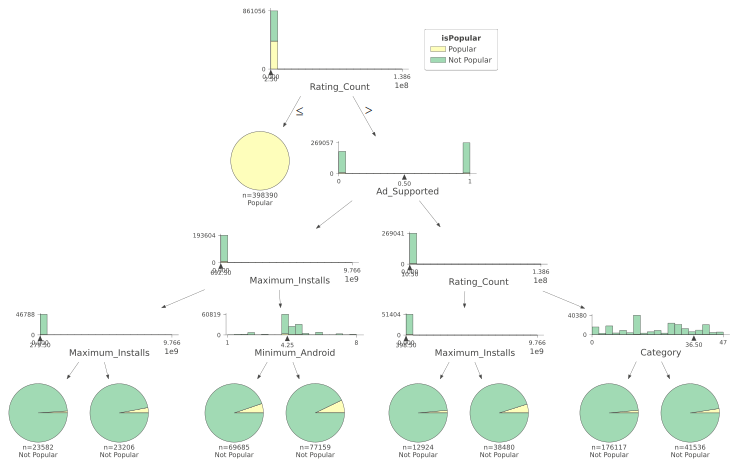

In [84]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, x_train_logistic, y_train.isPopular.values,
                target_name="isPopular",
                feature_names=list(x_train_logistic.columns),
                class_names=['Popular','Not Popular']
)

viz